In [105]:
import glob

import tensorflow as tf

from tensorflow.python.summary.summary_iterator import summary_iterator
from tensorflow.python.framework import tensor_util

from matplotlib import pyplot as plt
import yaml

import itertools

import numpy as np

In [2]:
metrics = ['accuracy_L1', 'loss', "I_XZ", "I_YZ"]

def event_file(path):
    files = glob.glob(f"{path}/*")
    return files[0]

def read_metrics(path):
    data = dict(zip(metrics,  [[] for x in range(len(metrics))]))
    
    for e in summary_iterator(event_file(path)):
        for v in e.summary.value:
            if v.tag in metrics:
                t = tensor_util.MakeNdarray(v.tensor)
                data[v.tag].append(float(t))
    return data


data = read_metrics("../artifacts-server/vdb-fashion_mnist--2019-11-22--00-57-25/logs/train");


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


In [3]:
def read_model_metrics(model_path):
    return dict(
        train=read_metrics(f"{model_path}/logs/train"),
        test=read_metrics(f"{model_path}/logs/test")
    )

data = read_model_metrics("../artifacts-server/vdb-fashion_mnist--2019-11-22--00-57-25")

In [4]:
# Fashion MNIST (M=1, K=2, β=0.001)
fmnist_experiments = (
    "../artifacts-server/vdb-fashion_mnist--2019-11-21--23-23-38",
    "../artifacts-server/vdb-fashion_mnist--2019-11-21--23-49-41",
    "../artifacts-server/vdb-fashion_mnist--2019-11-22--00-24-25",
    "../artifacts-server/vdb-fashion_mnist--2019-11-22--00-57-25",
)

In [53]:
np.linspace(0, 1, 5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

('fashion_mnist', 0.001, 'vdb/e1:1024|e2:1024|z:2', 100)


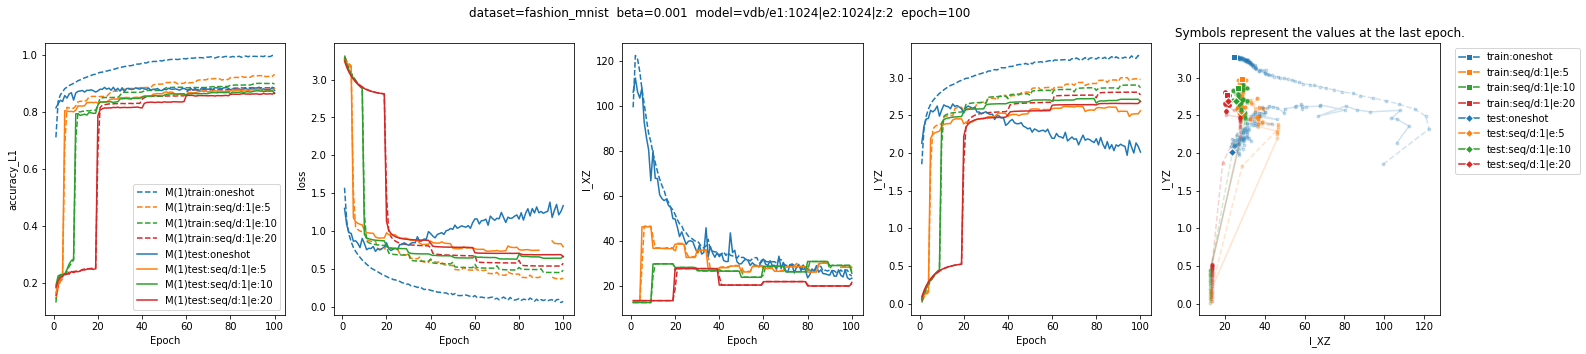

In [90]:
ticks = {
   'accuracy_L1': np.linspace(0, 1, 5),
   'loss': np.linspace(0, 3, 5),
   'I_XZ': np.linspace(0, 200, 5),
   'I_YZ': np.linspace(0, 3, 5),
}

def extract_fixed_params(setting, params):

    return tuple(

        setting[m] for m in params
    )

def plot_experiments(experiments,
                    sets=['test'], fixed_params=['dataset', 'beta', 'model', 'epoch'],
                    ticks=None
                    ):
    cm = plt.get_cmap('tab10')
        
    experiment_metrics = []
    experiment_settings = []
    total_experiments = len(experiments)
    
    for e in experiments:
        with open(f"{e}/summary.yml", "r") as fh:
            setting  = yaml.safe_load(fh)

        experiment_settings.append(setting)
        experiment_metrics.append(read_model_metrics(e))

    plt.figure(figsize=(25, 5))
    
    params = extract_fixed_params(experiment_settings[0], fixed_params)
    print(params)

    for e in experiment_settings[1:]:
        assert params == extract_fixed_params(e, fixed_params), "Fixed params are not the same"
    
    epoch = list(range(1, experiment_settings[0]['epoch']+1))
    for i, m in enumerate(metrics):
        plt.subplot(1, 5, i+1)
        for t in sets:
            for j, n in enumerate(experiment_settings):
                
                color = cm.colors[j]
                met = experiment_metrics[j][t]
                stategy = n['strategy']
                plt.plot(epoch, met[m], "--" if t == "train" else "-", color=color, label=f"M({n['M']}){t}:{stategy}")
                
                if ticks:
                    plt.yticks(ticks[m])

        plt.ylabel(m)
        plt.xlabel("Epoch")
        if i == 0:
            plt.legend()
    plt.subplot(1, 5, 5)
    for t in sets:
        for j, n in enumerate(experiment_settings):
            color = cm.colors[j]
            i_yz, i_xz = experiment_metrics[j][t]["I_YZ"], experiment_metrics[j][t]["I_XZ"]
            stategy = n['strategy']
            plt.plot(i_xz, i_yz, "--" if t == "train" else "-", color=color, marker=".", alpha=0.2)
            
            plt.plot(
                [n['metrics'][t]['I_XZ']],
                [n['metrics'][t]['I_YZ']],
                marker="s" if t == "train" else "D",
                color=color,
                markeredgecolor="w",
                label=f"{t}:{stategy}"
            )
            plt.title("Symbols represent the values at the last epoch.")
            plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
            if ticks:
                plt.xticks(ticks['I_XZ'])
                plt.yticks(ticks['I_YZ'])
            
    plt.ylabel("I_YZ")
    plt.xlabel("I_XZ")
    
    name = "  ".join(map(lambda t: f"{t[0]}={t[1]}", zip(fixed_params, params)))
    plt.suptitle(name)

plot_experiments(fmnist_experiments, sets=["train", "test"])

('fashion_mnist', 0.001, 'vdb/e1:1024|e2:1024|z:2', 1, 100)


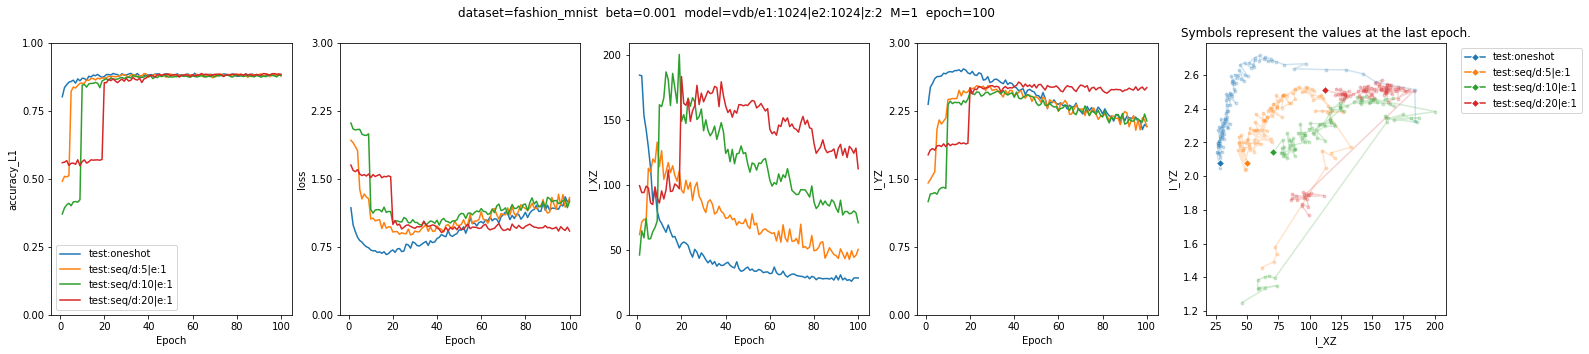

In [61]:
plot_experiments(
    (
        "../artifacts-server/vdb-fashion_mnist--2019-11-22--12-10-34",
        "../artifacts-server/vdb-fashion_mnist--2019-11-22--12-36-06",
        "../artifacts-server/vdb-fashion_mnist--2019-11-22--13-16-06",
        "../artifacts-server/vdb-fashion_mnist--2019-11-22--13-55-40",
    ),
    sets=["test"]
)

('cifar10', 0.001, 'vdb/e1:1024|e2:1024|z:2', 1, 100)


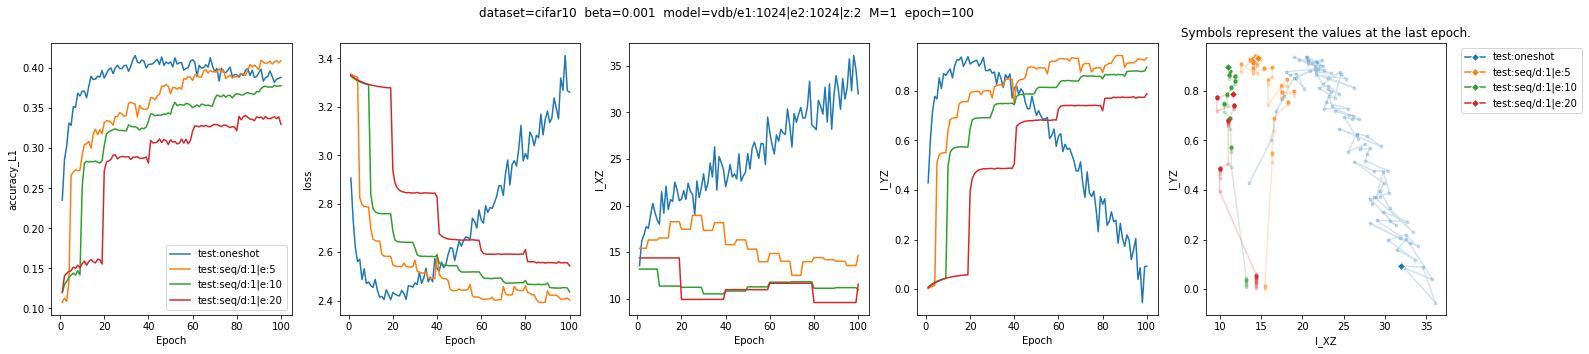

In [46]:
plot_experiments(
    (
        "../artifacts-server/vdb-cifar10--2019-11-22--08-56-14",
        "../artifacts-server/vdb-cifar10--2019-11-22--09-31-02",
        "../artifacts-server/vdb-cifar10--2019-11-22--10-12-28",
        "../artifacts-server/vdb-cifar10--2019-11-22--10-55-03"
    ),
    sets=["test"]
)

# FashionMNIST(K=256, beta=0.001)

In [67]:
fmnist_k256_ticks = {
   'accuracy_L1': np.linspace(0.5, 1, 5),
   'loss': np.linspace(0, 3, 5),
   'I_XZ': np.linspace(0, 1500, 5),
   'I_YZ': np.linspace(0, 3, 5),
}


## M=1

In [87]:
fmnist_one_shot_m1 = "../artifacts-server/vdb-fashion_mnist--2019-11-22--18-27-11"

('fashion_mnist', 0.001, 'vdb/e1:1024|e2:1024|z:256', 1, 100)


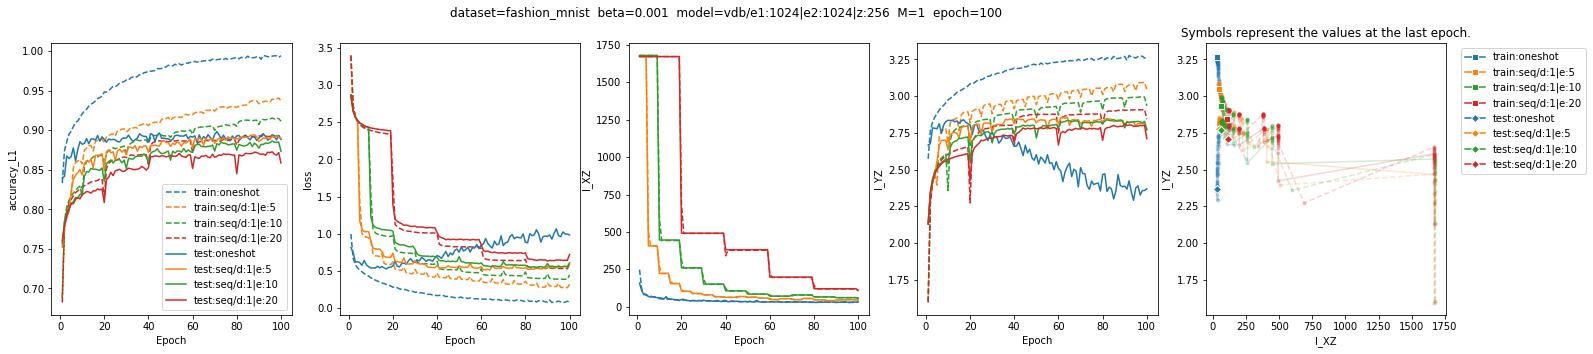

In [76]:
plot_experiments(
    (
         "../artifacts-server/vdb-fashion_mnist--2019-11-22--18-27-11",
         "../artifacts-server/vdb-fashion_mnist--2019-11-22--18-54-27",
         "../artifacts-server/vdb-fashion_mnist--2019-11-22--19-33-42",
         "../artifacts-server/vdb-fashion_mnist--2019-11-22--20-09-59",
    )
    , sets=[
        "train",
        "test"
    ],
#     ticks=fmnist_k256_ticks
)

('fashion_mnist', 0.001, 'vdb/e1:1024|e2:1024|z:256', 1, 100)


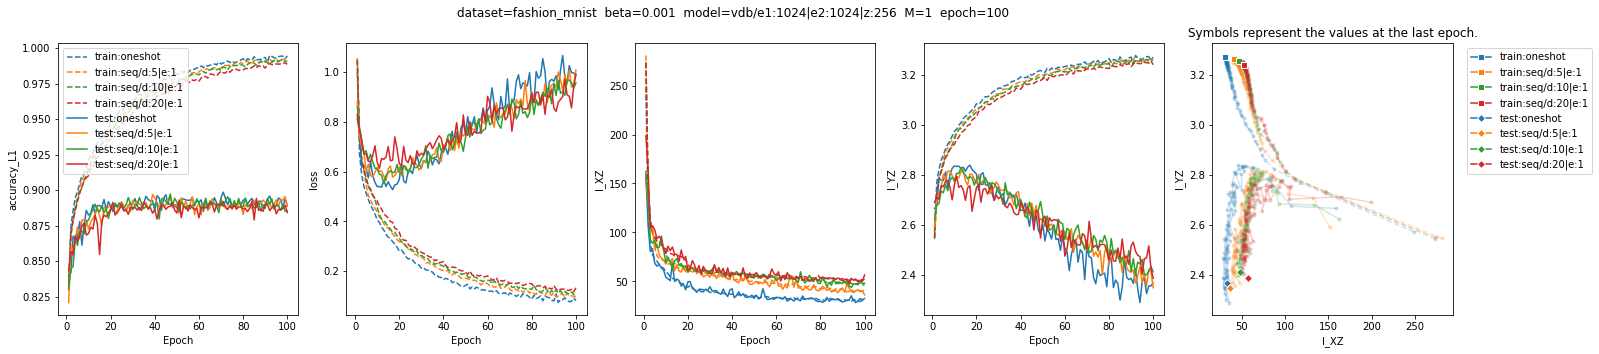

In [77]:
plot_experiments(
    (
         "../artifacts-server/vdb-fashion_mnist--2019-11-22--18-27-11",
        
         "../artifacts-server/vdb-fashion_mnist--2019-11-22--20-47-05",
         "../artifacts-server/vdb-fashion_mnist--2019-11-22--21-32-12",
         "../artifacts-server/vdb-fashion_mnist--2019-11-22--22-14-15",
    )
    , 
    sets=[
        "train",
        "test"
    ],
)

## M=3

('fashion_mnist', 0.001, 'vdb/e1:1024|e2:1024|z:256', 100)


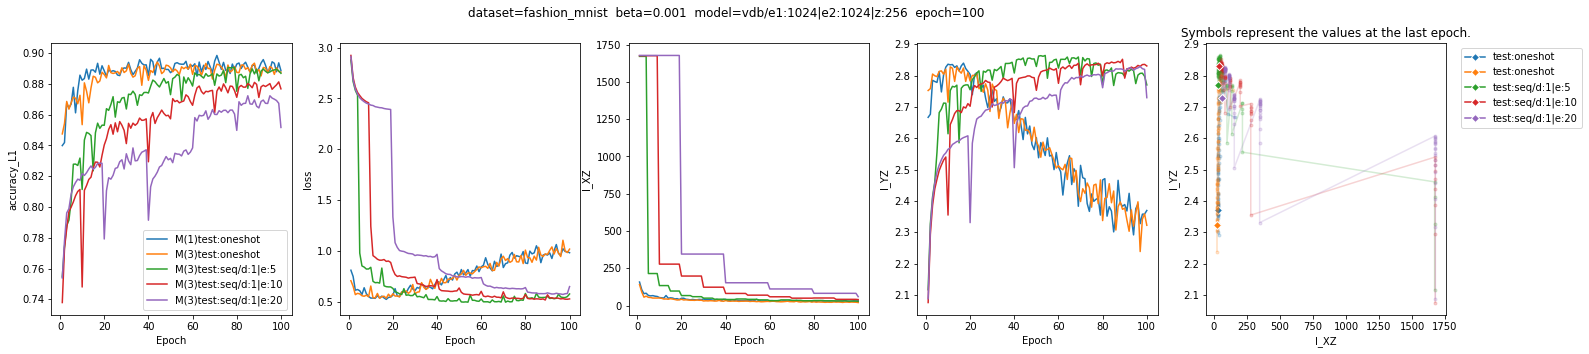

In [103]:
plot_experiments(
    (
        fmnist_one_shot_m1,
        "../artifacts-server/vdb-fashion_mnist--2019-11-24--09-35-02",
        "../artifacts-server/vdb-fashion_mnist--2019-11-24--10-03-26",
        "../artifacts-server/vdb-fashion_mnist--2019-11-24--10-43-56",
        "../artifacts-server/vdb-fashion_mnist--2019-11-24--11-21-11",
    ),
    sets=[
#         "train",
        "test"
    ]
)            

('fashion_mnist', 0.001, 'vdb/e1:1024|e2:1024|z:256', 100)


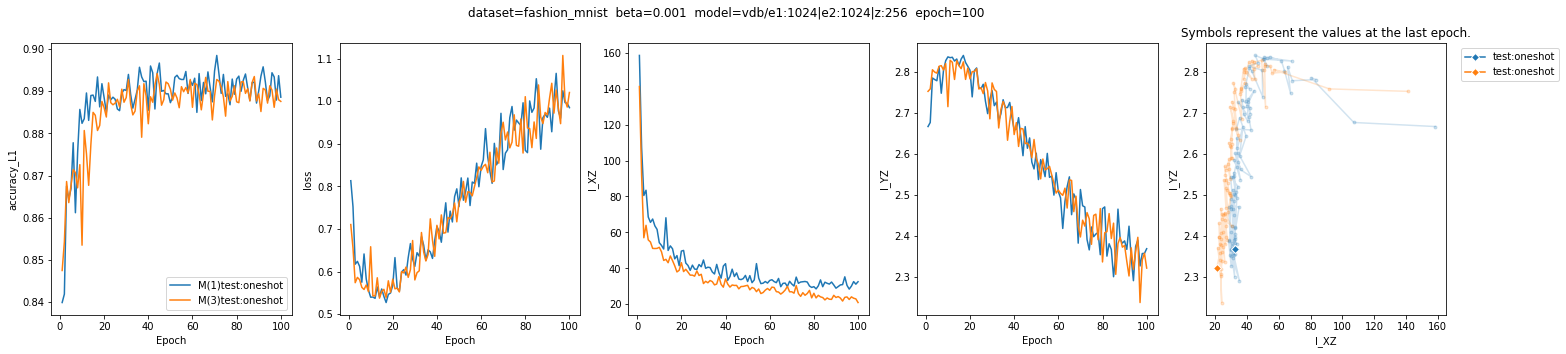

In [104]:
plot_experiments(
    (
        fmnist_one_shot_m1,
        "../artifacts-server/vdb-fashion_mnist--2019-11-24--09-35-02",
#         "../artifacts-server/vdb-fashion_mnist--2019-11-24--11-57-08",
#         "../artifacts-server/vdb-fashion_mnist--2019-11-24--12-41-40",
#         "../artifacts-server/vdb-fashion_mnist--2019-11-24--13-25-37",
    ),
    sets=[
#         "train",
        "test"
    ]
)            

## M=6

('fashion_mnist', 0.001, 'vdb/e1:1024|e2:1024|z:256', 100)


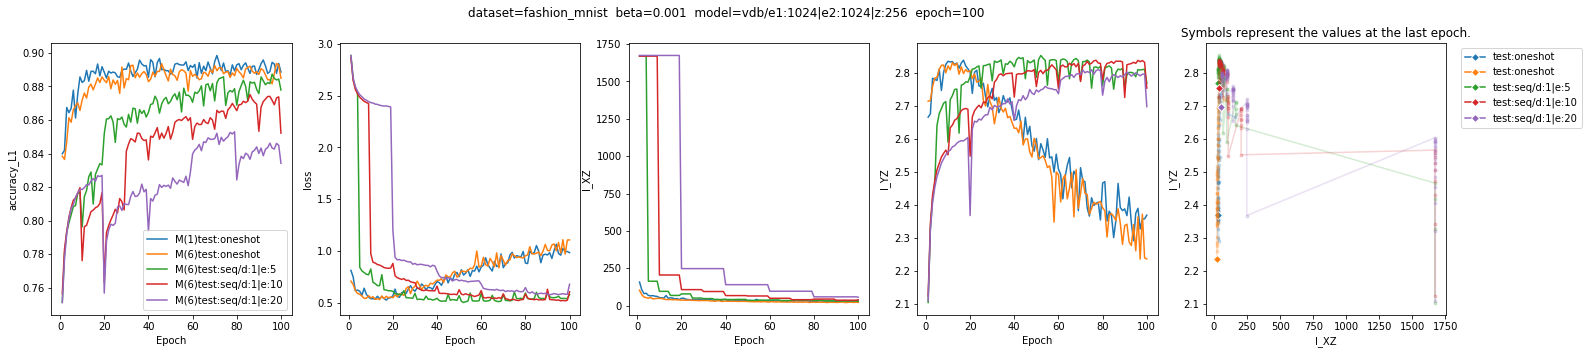

In [101]:
plot_experiments(
    (
        fmnist_one_shot_m1,
        "../artifacts-server/vdb-fashion_mnist--2019-11-23--10-06-54",
        "../artifacts-server/vdb-fashion_mnist--2019-11-23--10-35-35",
        "../artifacts-server/vdb-fashion_mnist--2019-11-23--11-16-29",
        "../artifacts-server/vdb-fashion_mnist--2019-11-23--11-56-12",
    ),
    sets=[
#         "train",
        "test"
    ]
)

('fashion_mnist', 0.001, 'vdb/e1:1024|e2:1024|z:256', 100)


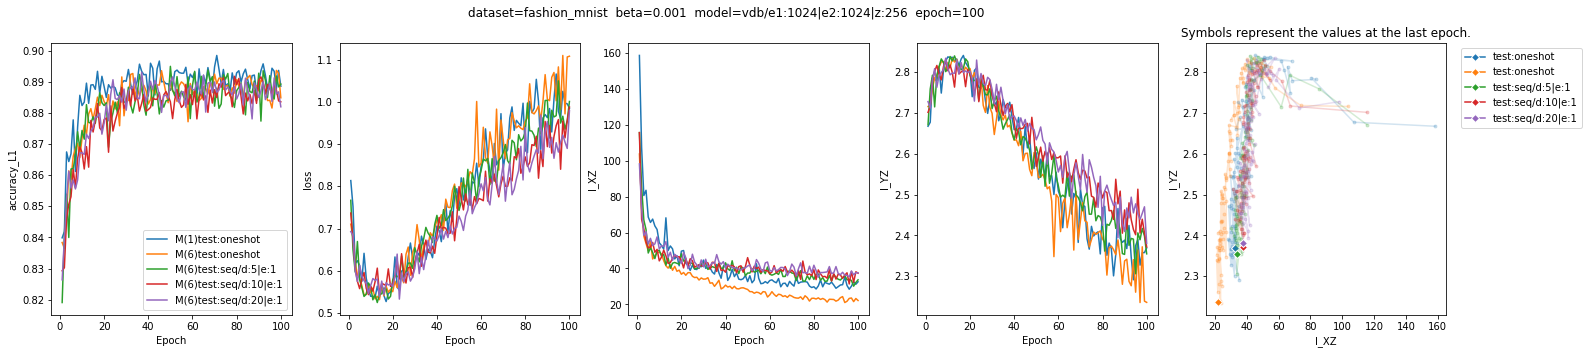

In [100]:
plot_experiments(
    (
        fmnist_one_shot_m1,
        "../artifacts-server/vdb-fashion_mnist--2019-11-23--10-06-54",
        "../artifacts-server/vdb-fashion_mnist--2019-11-23--12-33-51",
        "../artifacts-server/vdb-fashion_mnist--2019-11-23--13-20-58",
        "../artifacts-server/vdb-fashion_mnist--2019-11-23--14-06-06",
    ),
    sets=[
#         "train",
        "test"
    ]
)

## M=12

('fashion_mnist', 0.001, 'vdb/e1:1024|e2:1024|z:256', 100)


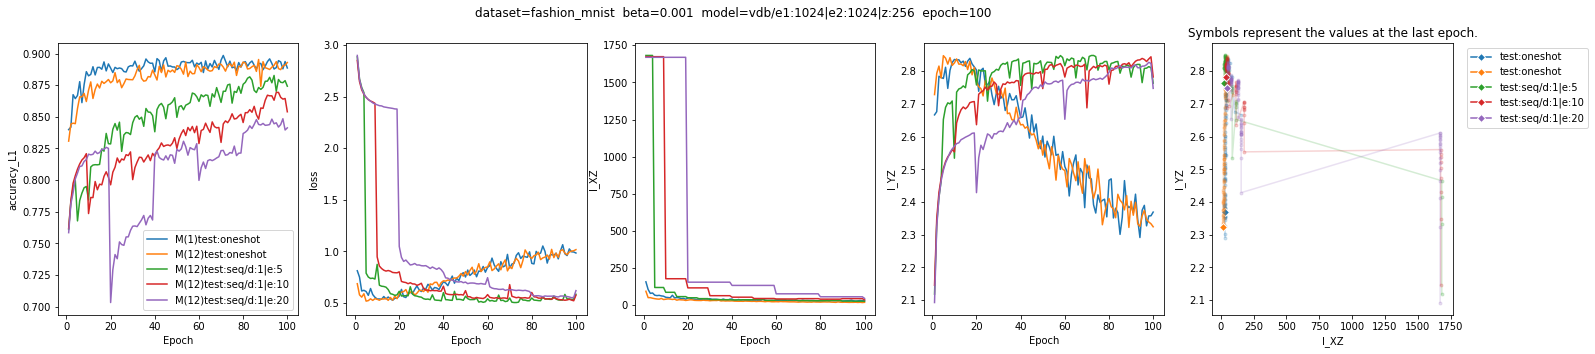

In [99]:
plot_experiments(
    (
        fmnist_one_shot_m1,
        "../artifacts-server/vdb-fashion_mnist--2019-11-23--15-31-01",
        "../artifacts-server/vdb-fashion_mnist--2019-11-23--16-00-55",
        "../artifacts-server/vdb-fashion_mnist--2019-11-23--16-47-20",
        "../artifacts-server/vdb-fashion_mnist--2019-11-23--17-27-13",
    ),
    sets=[
#         "train",
        "test"
    ]
)

('fashion_mnist', 0.001, 'vdb/e1:1024|e2:1024|z:256', 100)


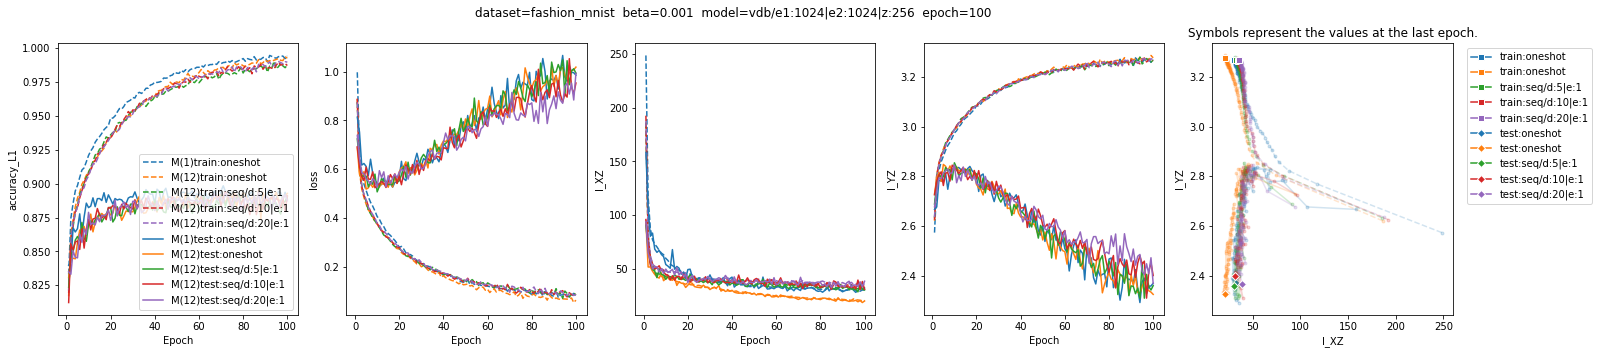

In [98]:
plot_experiments(
    (
        fmnist_one_shot_m1,
        "../artifacts-server/vdb-fashion_mnist--2019-11-23--15-31-01",
        "../artifacts-server/vdb-fashion_mnist--2019-11-23--18-06-03",
        "../artifacts-server/vdb-fashion_mnist--2019-11-23--18-54-42",
        "../artifacts-server/vdb-fashion_mnist--2019-11-23--19-41-29",
    ),
    sets=[
        "train",
        "test"
    ]
)

('fashion_mnist', 1e-05, 'vdb/e1:1024|e2:1024|z:256', 1)


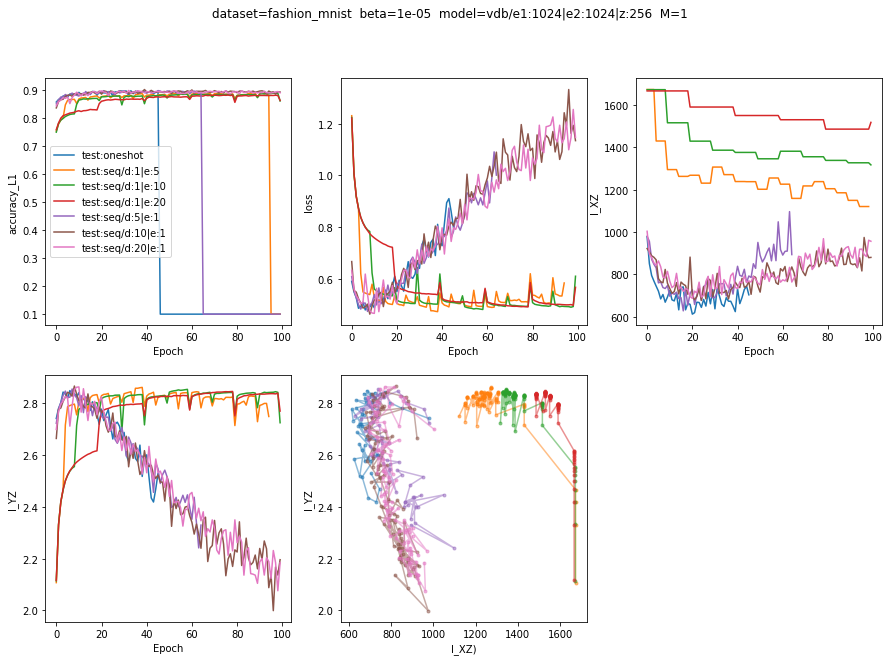

In [226]:
plot_experiments(
    (
        "../artifacts-server/vdb-fashion_mnist--2019-11-22--22-59-31",
        "../artifacts-server/vdb-fashion_mnist--2019-11-22--23-25-39",
        "../artifacts-server/vdb-fashion_mnist--2019-11-23--00-03-59",
        "../artifacts-server/vdb-fashion_mnist--2019-11-23--00-41-25",
        "../artifacts-server/vdb-fashion_mnist--2019-11-23--01-18-11",
        "../artifacts-server/vdb-fashion_mnist--2019-11-23--02-02-33",
        "../artifacts-server/vdb-fashion_mnist--2019-11-23--02-46-29",
    ),
    sets=["test"]
)